<a href="https://colab.research.google.com/github/iamujjwalgupta/Data-Science-Projects/blob/master/Simple_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

# Step 1. Reading and Understanding the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file.
startup = pd.read_csv("/content/data-science-projects/Startup.csv")
startup.head(10)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [4]:
startup.shape

(50, 4)

In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Step 2. Visualising the data

Scatter Plot

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

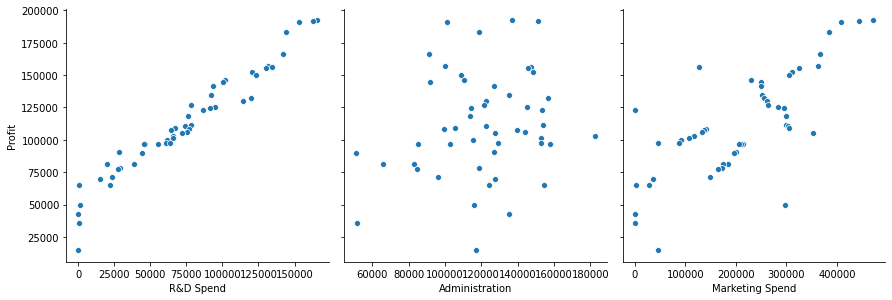

In [8]:
sns.pairplot(startup, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars='Profit',size=4, aspect=1, kind='scatter')
plt.show()

Heat Map

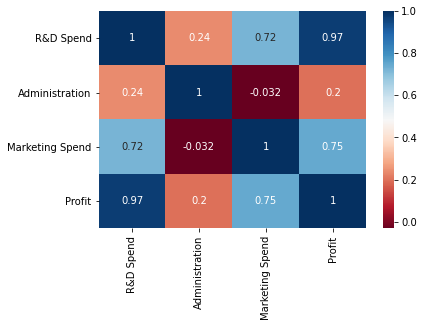

In [9]:
#plt.figure(figsize=(7,7))
sns.heatmap(startup.corr(), cmap="RdBu",  annot = True)
plt.show()

**# Step 3. Performaing Simple Linear Regression and Multiple Linear Regression**

Equation of linear regression 

y = c + mx

y = c + m1x1 + m2x2 + ... + mnxn

-  y is the response
-  c is the intercept
-  m1 is the coefficient for the first feature
-  mn is the coefficient for the nth feature

In our case:

y = c + m1*'R&D Spent' + m2*'Administration' + m3*'Marketing Spent'

The m values are called the model **coefficients** or **model parameters**.

We first assign the feature variable, 'R&D Spent','Administration', and 'Marketing Spent', in this case, to the variable `X` and the response variable `Profit` to the variable `y`.

In [10]:
#Assign the variable for x and y axis for Simple Linear regression
x_SLR = startup[['R&D Spend']]
y_SLR = startup['Profit']

#Assign the variable for x and y axis for Multiple Kinear regression
x_MLR = startup[['R&D Spend','Administration','Marketing Spend']]
y_MLR = startup['Profit']
print(x_MLR.head())

   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42


Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [12]:
from sklearn.model_selection import train_test_split
#Set test and train parameter for Single Linear Regression
x_SLR_train, x_SLR_test, y_SLR_train, y_SLR_test = train_test_split(x_SLR, y_SLR, train_size = 0.7, test_size = 0.3, random_state = 100)

#Set test and train parameter for Multiple Linear Regression
x_MLR_train, x_MLR_test, y_MLR_train, y_MLR_test = train_test_split(x_MLR, y_MLR, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
print(x_MLR_train.head())

    R&D Spend  Administration  Marketing Spend
25   64664.71       139553.16        137962.62
26   75328.87       144135.98        134050.07
35   46014.02        85047.44        205517.64
17   94657.16       145077.58        282574.31
7   130298.13       145530.06        323876.68


In [14]:
print(y_MLR_train.head())

25    107404.34
26    105733.54
35     96479.51
17    125370.37
7     155752.60
Name: Profit, dtype: float64


In [15]:
#Fitting simple regression to the training set
from sklearn.linear_model import LinearRegression
SLR_Regressor = LinearRegression()
MLR_Regressor = LinearRegression()

# Fit the model using Regressor.fit() for Simple Linear Regression
SLR_Regressor.fit(x_SLR_train, y_SLR_train)

# Fit the model using Regressor.fit() for Multiple Linear Regression
MLR_Regressor.fit(x_MLR_train, y_MLR_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(x_MLR_train)

    R&D Spend  Administration  Marketing Spend
25   64664.71       139553.16        137962.62
26   75328.87       144135.98        134050.07
35   46014.02        85047.44        205517.64
17   94657.16       145077.58        282574.31
7   130298.13       145530.06        323876.68
47       0.00       135426.92             0.00
31   61136.38       152701.92         88218.23
32   63408.86       129219.61         46085.25
19   86419.70       153514.11             0.00
21   78389.47       153773.43        299737.29
13   91992.39       135495.07        252664.93
1   162597.70       151377.59        443898.53
4   142107.34        91391.77        366168.42
12   93863.75       127320.38        249839.44
27   72107.60       127864.55        353183.81
40   28754.33       118546.05        172795.67
22   73994.56       122782.75        303319.26
29   65605.48       153032.06        107138.38
9   123334.88       108679.17        304981.62
16   78013.11       121597.55        264346.06
44   22177.74

In [17]:
#Reshape 2D array in 1D array in Simple Linear Regression case
x_SLR_train = x_SLR_train.values.reshape(-1,1)
X_SLR_test = x_SLR_test.values.reshape(-1,1)

In [18]:
#x_MLR_train = x_MLR_train.values.reshape(-1,1)
#x_MLR_train = pd.DataFrame({'x_MLR_train': x_MLR_train[:, 0]})
#X_test = X_test.values.reshape(-1,1)
x_MLR_train_Col1=x_MLR_train['R&D Spend'].to_numpy()
x_MLR_train_Col2=x_MLR_train['Administration'].to_numpy()
x_MLR_train_Col3=x_MLR_train['Marketing Spend'].to_numpy()

x_MLR_test_Col1=x_MLR_test['R&D Spend'].to_numpy()
x_MLR_test_Col2=x_MLR_test['Administration'].to_numpy()
x_MLR_test_Col3=x_MLR_test['Marketing Spend'].to_numpy()


x_MLR_train_Col3

array([137962.62, 134050.07, 205517.64, 282574.31, 323876.68,      0.  ,
        88218.23,  46085.25,      0.  , 299737.29, 252664.93, 443898.53,
       366168.42, 249839.44, 353183.81, 172795.67, 303319.26, 107138.38,
       304981.62, 264346.06,  28334.72,      0.  , 297114.46, 256512.92,
       164470.71, 407934.54, 210797.67,  91131.24, 229160.95, 261776.23,
       304768.73, 174999.3 , 383199.62, 140574.81, 311613.29])

In [19]:
print(SLR_Regressor.intercept_)
print(SLR_Regressor.coef_)

46823.27683169804
[0.87393216]


In [ ]:
#x_SLR_train

Scatter graph for x-train and y train data for Simple Linear Regression

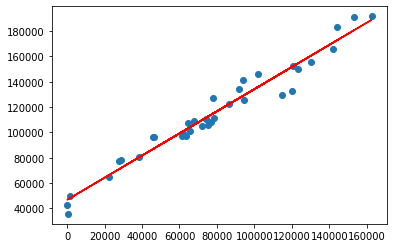

In [20]:
plt.scatter(x_SLR_train, y_SLR_train)
plt.plot(x_SLR_train, 46823.27683169805 + 0.87393216*x_SLR_train, 'r')
plt.show()

# Step 4. Scatter graph for x_train and y_train data for Multiple Linear Regression.

In [21]:
print(MLR_Regressor.intercept_)
print(MLR_Regressor.coef_)

47085.14615116072
[ 0.82847059 -0.01579485  0.02421324]


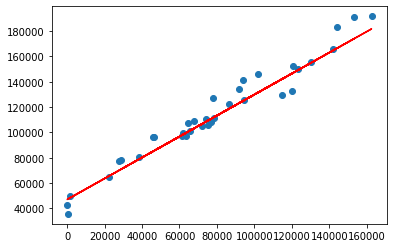

In [22]:
#R&D Spend with Y-train data.
plt.scatter(x_MLR_train_Col1, y_MLR_train)
plt.plot(x_MLR_train_Col1, 47085.14615116072 + 0.82847059*x_MLR_train_Col1, 'r')
plt.show()

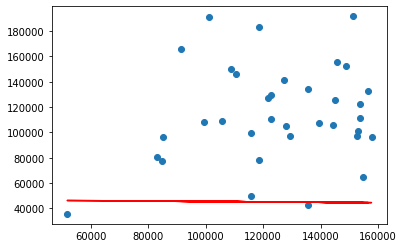

In [23]:
#Administration data with Y-train data.
plt.scatter(x_MLR_train_Col2, y_MLR_train)
plt.plot(x_MLR_train_Col2, 47085.14615116072 - 0.01579485*x_MLR_train_Col2, 'r')
plt.show()

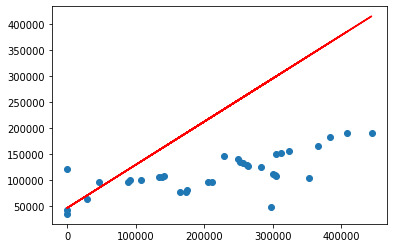

In [24]:
#Marketing Spend data with Y-train data.
plt.scatter(x_MLR_train_Col3, y_MLR_train)
plt.plot(x_MLR_train_Col3, 47085.14615116072 + 0.82847059*x_MLR_train_Col3, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [25]:
y_SLR_pred = SLR_Regressor.predict(x_SLR_test)
SLR_res = (y_SLR_test - y_SLR_pred) 
print(SLR_res.head())

6     -8345.546895
36    18834.731406
37     4611.716464
28    -1265.444541
43     9384.747018
Name: Profit, dtype: float64


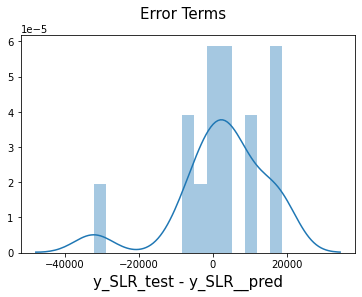

In [26]:
fig = plt.figure()
sns.distplot(SLR_res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_SLR_test - y_SLR__pred', fontsize = 15)         # X-label
plt.show()

Looking for pattern in the Residual

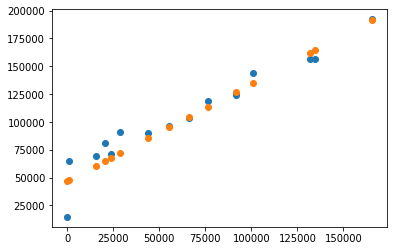

In [27]:
plt.scatter(x_SLR_test, y_SLR_test)
plt.scatter(x_SLR_test, y_SLR_pred)
plt.show()

In [28]:
#Checking the R-squared on the test set
from sklearn.metrics import r2_score

SLR_r_squared = r2_score(y_SLR_test, y_SLR_pred)
print(SLR_r_squared)

0.9180698548847864


Residual Analysis for Mutliple Linear Regression

In [29]:
y_MLR_pred = MLR_Regressor.predict(x_MLR_test)
MLR_res = (y_MLR_test - y_MLR_pred) 
print(MLR_res.head())

6     -3255.039887
36    17012.862573
37     2392.624638
28     1499.599961
43    10979.379058
Name: Profit, dtype: float64


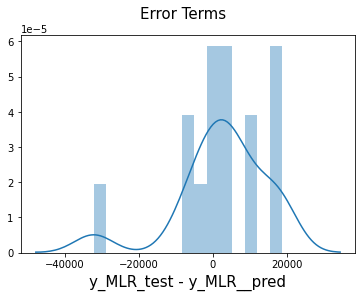

In [30]:
fig = plt.figure()
sns.distplot(SLR_res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_MLR_test - y_MLR__pred', fontsize = 15)         # X-label
plt.show()

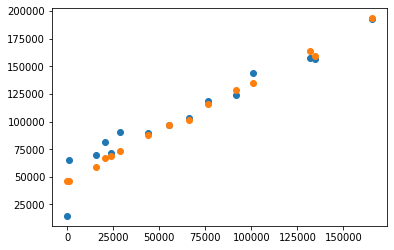

In [31]:
#R&D Spend
plt.scatter(x_MLR_test_Col1, y_MLR_test)
plt.scatter(x_MLR_test_Col1, y_MLR_pred)
plt.show()

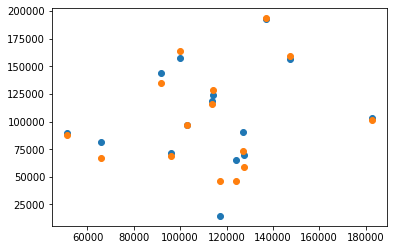

In [32]:
#Administration Spend
plt.scatter(x_MLR_test_Col2, y_MLR_test)
plt.scatter(x_MLR_test_Col2, y_MLR_pred)
plt.show()

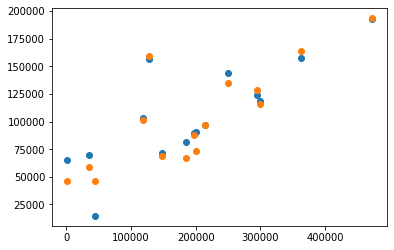

In [33]:
#Marketing Spend'
plt.scatter(x_MLR_test_Col3, y_MLR_test)
plt.scatter(x_MLR_test_Col3, y_MLR_pred)
plt.show()

In [34]:
#Checking the R-squared on the test set
from sklearn.metrics import r2_score

MLR_r_squared = r2_score(y_MLR_test, y_MLR_pred)
print(MLR_r_squared)

0.9240267928295798
